In [84]:
pwd

'C:\\Users\\rbvan\\Desktop\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression'

In [85]:
import pandas as pd
import numpy as np

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
style.use('fivethirtyeight')


%matplotlib inline

In [87]:
train = pd.read_csv('titanic_train.csv')

In [88]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [89]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1])

In [90]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr. Karl Howell


In [91]:
train['Title2'] = train['Title'].apply(lambda x: x.split('.')[0])

In [92]:
train['Title2'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [93]:
l = train['Name']

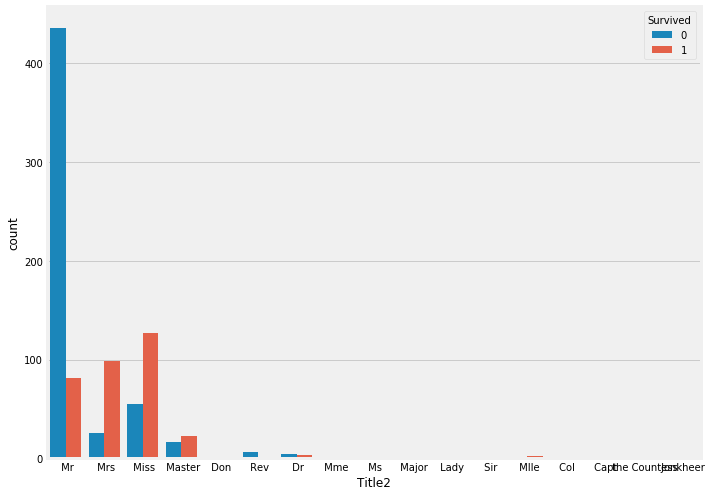

In [94]:
plt.figure(figsize=(10,7))
sns.countplot(x='Title2',data=train,hue='Survived',)
plt.tight_layout()

In [95]:
train.groupby('Title2').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Title2,,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,1,2,2
Don,1,1,1,1,1,1,1,1,1,1,0,1,1
Dr,7,7,7,7,7,6,7,7,7,7,3,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,36,40,40,40,40,7,40,40
Miss,182,182,182,182,182,146,182,182,182,182,47,181,182


In [96]:
train.drop('Cabin',axis=1,inplace=True)

In [97]:
train.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [98]:
avgage = train.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()

In [99]:
f1 = 34.611765
m1 = 41.281386
f2 = 28.722973
m2 = 30.740707
f3 = 21.750000
m3 = 26.507589

In [100]:
def impute_age(cols):
    Age = cols[2]
    Pclass = cols[0]
    Sex = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            if Sex == 'female':
                return f1
            else:
                return m1

        elif Pclass == 2:
            if Sex == 'female':
                return f2
            else:
                return m2
            
        else:
            if Sex == 'female':
                return f3
            else:
                return m3
    else:
        return Age

In [101]:
train['NewAge'] = train[['Pclass','Sex','Age']].apply(impute_age,axis=1)

In [102]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title2,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr. Owen Harris,Mr,22.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs,38.00
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss. Laina,Miss,26.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs. Jacques Heath (Lily May Peel),Mrs,35.00
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr. William Henry,Mr,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev. Juozas,Rev,27.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss. Margaret Edith,Miss,19.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,"Miss. Catherine Helen ""Carrie""",Miss,21.75
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr. Karl Howell,Mr,26.00


In [103]:
print(f1)
print(m1)
print(f2)
print(m2)
print(f3)
print(m3)

34.611765
41.281386
28.722973
30.740707
21.75
26.507589


In [104]:
train['Age'] = train[['Pclass','Sex','Age']].apply(impute_age,axis=1)

In [105]:
train.drop('NewAge',axis=1,inplace=True)

In [106]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss. Laina,Miss


In [107]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [108]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [109]:
sex.head(3)

,male
0,1
1,0
2,0


In [110]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [111]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [65]:
#PClass = pd.get_dummies(train['Pclass'],drop_first=True)

In [67]:
#PClass.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [112]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss. Laina,Miss


In [113]:
train = pd.concat([train,sex,embark],axis=1)

In [114]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title2,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr. Owen Harris,Mr,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss. Laina,Miss,0,0,1


In [115]:
train.drop(['Sex','Embarked','Name','Ticket','Title','Title2'],axis=1,inplace=True)

In [116]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [117]:
train.drop('PassengerId',axis=1,inplace=True)

In [118]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel = LogisticRegression(max_iter=1000)

In [123]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [124]:
predictions = logmodel.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

